Importing the required libraries for the analysis :
- Numpy
- Pandas
- Matplotlib
- Seaborn

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Listing out various functions that have been used throughout the EDA :

Segregation Function : Used to create DataFrame from the dataset for better analysis

In [2]:
def seg(df,var1,var2):  
    df_sub = df.loc[(df[var1]==var2)]  #loc is used to locate var2 present in column var1
    
    return df_sub

Outliers Function : Used to seperate out the outliers from data

In [3]:
def outliers(df,var):
    
    q1       =     df[var].quantile(0.25)      # 1st quartile : 25th percentile value
    q3       =     df[var].quantile(0.75)      # 3rd quartile : 75th percentile value
    iqr      =     q3 - q1                     # inter-quartile range 
    low      =     q1 - (1.5*iqr)
    high     =     q3 + (1.5*iqr)
    df_temp  =     df.loc[(df[var] > low) & (df[var] < high)]
    
    return df_temp[var]

Mean Function : Used to replace the missing values with the mean

In [4]:
def fill_mean(df,var1,var2):
    df[var1] = df[var1].fillna(df[var2].mean()) # fillna is used to fill null(missing) values
    df[var1] = round(df[var1],2) # round is used to round of the output for 2 decimal places here
    
    return df[var1]    

Ranking Function : Two functions are created to rank players on different parameters
- Type_1 : Performance directly proportional to value of parameter
- Type_2 : Performance inversely proportional to value of parameter

In [5]:
def rank_type1(df,var1,var2):
    df[var2] = df[var1].rank(method='dense', ascending=False)
    
    return df[var2]

In [6]:
def rank_type2(df,var_1,var_2):
    df[var_2] = df[var_1].rank(method='dense', ascending=True)
    
    return df[var_2]

Short List Function : Used to short-list players based on Matches_Played (experience)

In [7]:
def short_list(df):
    cut_off = df['Matches_Played'].quantile(0.5) # Here cut_off is 50 percentile
    df = df.loc[df['Matches_Played'] >= cut_off]
    
    return df

Sum of Ranking Function : Used to sort the players based on cumalative ranking across parameters

In [8]:
def batters_sum_rank(df):
     #Generating the summation rank of each player
    df['sum_rank']=rank_type1(df,"Average","rank_avg")+rank_type1(df,"Strike_Rate","rank_sr") 
     #Sorting the data according to sum_rank (less the sum better the performance)
    df = df.sort_values(by='sum_rank')
    
    return df

In [9]:
def bowler_sum_rank(df):
    #Generating the summation rank of each player
    df['sum_rank']= rank_type2(df,"Economy","rank_eco")+rank_type2(df,"Bowling_average","rank_bavg")+rank_type2(df,"Bowling_Strike_Rate","rank_bsr")
     #Sorting the data according to sum_rank (less the sum better the performance)
    df = df.sort_values(by='sum_rank')
    
    return df

In [10]:
def ar_sum_rank(df):
    
    df['sum_rank']= rank_type1(df,'Strike_Rate','Rank_sr')+rank_type1(df,'Average','Rank_avg')+rank_type2(df,'Economy','Rank_eco')+rank_type2(df,'Bowling_Strike_Rate','Rank_Bsr')+rank_type2(frgn_ar,'Bowling_average','Rank_Bavg')
    df = df.sort_values(by='sum_rank')
    
    return df

# Selecting IPL's best Squad
An IPL squad of 25 players is selected based on the dataset

Importing & Inspecting the dataset (which is in the form of csv) using pandas library

In [12]:
df = pd.read_csv("H:\Gautam_Mittal\Data Science\Excel & Power BI\Excel\Other Datasets\IPLData.csv")
df.sample(10)

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
95,Kuldeep Sen,Rajasthan,Indian,Bowler,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,Anuj Rawat,Bangalore,Indian,Keeper,1,1.0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,3.0,0.0,0.0
64,R Sai Kishore,Gujarat,Indian,Bowler,0,38.0,NaN,NaN,NaN,43.0,17.40,5.46,NaN,NaN,NaN,NaN
216,Prithvi Shaw,Delhi,Indian,Batter,1,53.0,1305.0,24.62,146.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,Ayush Bodani,Lucknow,Indian,Allrounder,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,Daryl Mitchell,Rajasthan,Overseas,Allrounder,0,25.0,392.0,21.70,134.70,6.0,20.17,10.23,11.83,NaN,NaN,NaN
4,Shimron Hetmyer,Rajasthan,Overseas,Batter,1,31.0,517.0,25.85,151.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,Mustafizur Rahman,Delhi,Overseas,Bowler,1,38.0,9.0,9.00,52.94,38.0,29.50,7.84,22.58,NaN,NaN,NaN
142,Shivam Mavi,Kolkata,Indian,Allrounder,1,26.0,48.0,6.80,97.90,25.0,28.60,8.30,20.68,NaN,NaN,NaN
23,R Samarth,Hyderabad,Indian,Batter,0,23.0,275.0,13.80,94.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player Name          235 non-null    object 
 1   Team                 235 non-null    object 
 2   Nationality          235 non-null    object 
 3   Player_Type          235 non-null    object 
 4   Capped               235 non-null    int64  
 5   Matches_Played       215 non-null    float64
 6   Runs                 165 non-null    float64
 7   Average              161 non-null    float64
 8   Strike_Rate          163 non-null    float64
 9   Wickets              140 non-null    float64
 10  Bowling_average      135 non-null    float64
 11  Economy              143 non-null    float64
 12  Bowling_Strike_Rate  119 non-null    float64
 13  Catches              27 non-null     float64
 14  Run_outs             27 non-null     float64
 15  Stumps               27 non-null     flo

In [14]:
df.describe()

,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
count,235.000000,215.000000,165.000000,161.000000,163.000000,140.000000,135.000000,143.000000,119.000000,27.000000,27.000000,27.000000
mean,0.838298,43.897674,840.575758,21.792391,121.009939,31.485714,32.907185,8.223182,24.686134,30.962963,3.444444,6.259259
std,0.561802,48.695302,1270.341831,11.664156,30.739189,36.872420,18.191441,1.223541,12.982049,34.544822,5.010246,9.928950
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.360000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,11.500000,67.000000,13.800000,112.635000,6.000000,23.025000,7.390000,18.495000,3.500000,0.000000,0.000000
50%,1.000000,25.000000,289.000000,22.410000,128.630000,19.500000,29.070000,8.190000,21.750000,19.000000,1.000000,2.000000
75%,1.000000,56.000000,954.000000,29.300000,137.550000,40.500000,36.030000,8.785000,26.190000,51.500000,4.000000,7.000000
max,2.000000,220.000000,6283.000000,58.500000,190.240000,167.000000,153.000000,13.120000,108.000000,126.000000,21.000000,39.000000


In [15]:
df.groupby("Team").count()

,Player Name,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
Team,,,,,,,,,,,,,,,
Bangalore,21,21,21,21,20,14,14,14,15,15,15,11,4,4,4
Chenai,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
Chennai,24,24,24,24,21,15,15,15,14,14,14,10,2,2,2
Delhi,22,22,22,22,20,18,18,18,11,11,12,11,3,3,3
Delhi,2,2,2,2,2,1,1,1,1,1,1,1,0,0,0
Gujarat,22,22,22,22,22,17,17,17,16,16,16,13,2,2,2
Gujarat,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
Hyderabad,22,22,22,22,21,15,14,14,13,11,13,11,3,3,3
Kolkata,25,25,25,25,23,20,20,20,14,13,14,13,3,3,3


Checking the missing values (null) is the data

In [16]:
df.isnull().sum()

Player Name              0
Team                     0
Nationality              0
Player_Type              0
Capped                   0
Matches_Played          20
Runs                    70
Average                 74
Strike_Rate             72
Wickets                 95
Bowling_average        100
Economy                 92
Bowling_Strike_Rate    116
Catches                208
Run_outs               208
Stumps                 208
dtype: int64

# Data Pre-Processing & Cleaning
Through above observation there are many missing values that needs to be handled properly.
Dealing the data based on the player_type.

### Batters 

Creating an independent DataFrame "batters" consisting of all the batters as per data

In [17]:
batters = seg(df,"Player_Type","Batter")
batters.sample(10)

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
207,Kane Williamson,Hyderabad,Overseas,Batter,1,63.0,1885.0,40.11,131.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Anmolpreet Singh,Mumbai,Indian,Batter,1,1.0,16.0,16.00,114.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,Banuka Rajapaksa,Punjab,Overseas,Batter,0,18.0,320.0,26.70,136.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Rahul Tripathi,Hyderabad,Indian,Batter,1,62.0,1385.0,26.13,136.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Manish Pandey,Lucknow,Indian,Batter,1,154.0,3560.0,30.69,121.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Pratham Singh,Kolkata,Indian,Batter,0,27.0,829.0,33.20,127.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Shikhar Dhawan,Punjab,Indian,Batter,1,192.0,5783.0,34.63,126.60,4.0,16.5,8.25,12.0,NaN,NaN,NaN
23,R Samarth,Hyderabad,Indian,Batter,0,23.0,275.0,13.80,94.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Jason Roy,Gujarat,Overseas,Batter,1,13.0,329.0,29.91,129.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Ashwin Hebbar,Delhi,Indian,Batter,0,41.0,1117.0,34.90,125.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Droping the irrelevent columns 

In [18]:
batters.drop(batters.columns[9:16], axis = 1, inplace=True) 

Checking the missing values in "batters" DataFrame

In [19]:
batters.isnull().sum()

Player Name       0
Team              0
Nationality       0
Player_Type       0
Capped            0
Matches_Played    1
Runs              1
Average           1
Strike_Rate       1
dtype: int64

Finding the columns having missing value.
Since there exist a row having no data for analysis hence it is appropriate to drop that row.

In [20]:
batters.loc[batters.isnull().any(axis=1)]
batters.dropna(subset=batters.columns[5:9], how='all', inplace = True)

Now there is no missing data present in "batters"

In [21]:
batters.isnull().sum()

Player Name       0
Team              0
Nationality       0
Player_Type       0
Capped            0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
dtype: int64

Visualizing "batters" DataFrame after pre-processing (using seaborn library)

<AxesSubplot:xlabel='Average', ylabel='Strike_Rate'>

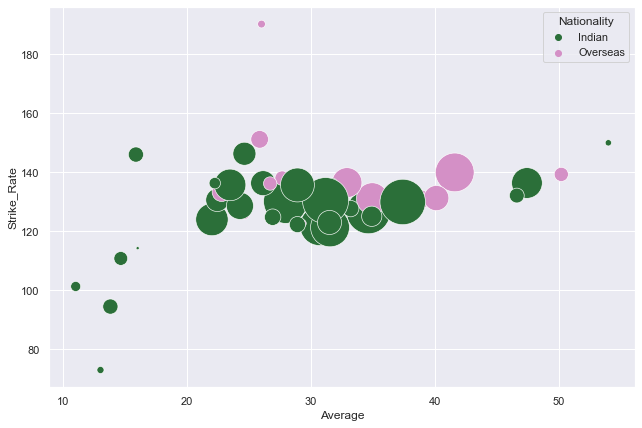

In [22]:
sns.set_theme(style = "darkgrid")
sns.set(rc={"figure.figsize":(10.5,7)})
sns.scatterplot(x=batters["Average"], y=batters["Strike_Rate"], hue=batters['Nationality'], palette="cubehelix", s=10*batters['Matches_Played'])

### Bowlers


Creating an independent DataFrame "bowlers" consisting of all the bowlers as per data

In [23]:
bowlers = seg(df,"Player_Type","Bowler ")
bowlers.sample(10) 

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
63,Jagadeesha Suchith,Hyderabad,Indian,Bowler,1,17.0,NaN,NaN,NaN,12.0,38.50,8.88,26.00,NaN,NaN,NaN
75,Simarjeet Singh,Chennai,Indian,Bowler,0,20.0,NaN,NaN,NaN,24.0,20.40,7.45,NaN,NaN,NaN,NaN
48,Kuldeep Yadav,Delhi,Indian,Bowler,1,45.0,57.0,9.50,76.00,40.0,30.90,8.28,22.40,NaN,NaN,NaN
76,Daniel Sams,Mumbai,Overseas,Bowler,1,5.0,NaN,NaN,NaN,6.0,153.00,8.50,108.00,NaN,NaN,NaN
80,Adam Milne,Chennai,Overseas,Bowler,1,9.0,NaN,NaN,NaN,7.0,44.00,9.62,27.43,NaN,NaN,NaN
37,Trent Boult,Rajasthan,Overseas,Bowler,1,62.0,13.0,4.33,68.42,76.0,26.09,8.40,18.64,NaN,NaN,NaN
87,Sean Abbott,Hyderabad,Overseas,Bowler,1,2.0,NaN,NaN,NaN,0.0,NaN,11.40,NaN,NaN,NaN,NaN
38,Mohammad Shami,Gujarat,Indian,Bowler,1,77.0,69.0,6.27,94.53,79.0,30.41,8.63,21.14,NaN,NaN,NaN
73,Maheesh Theekshana,Chennai,Overseas,Bowler,0,11.0,NaN,NaN,NaN,9.0,28.60,6.42,NaN,NaN,NaN,NaN
61,KC Cariappa,Rajasthan,Indian,Bowler,1,11.0,NaN,NaN,NaN,8.0,43.50,9.67,27.00,NaN,NaN,NaN


Dropping the irrelevent columns. 
Checking the missing values.

In [24]:
bowlers.drop(bowlers.columns[13:16], axis=1, inplace=True)
bowlers.drop(bowlers.columns[6:9], axis = 1, inplace=True)
bowlers.isnull().sum()

Player Name             0
Team                    0
Nationality             0
Player_Type             0
Capped                  0
Matches_Played          5
Wickets                 5
Bowling_average        10
Economy                 5
Bowling_Strike_Rate    26
dtype: int64

Finding the columns having missing data

In [25]:
bowlers.loc[bowlers.isnull().any(axis=1)]

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
53,Akash Deep,Bangalore,Indian,Bowler,0,22.0,26.0,18.5,6.42,NaN
54,KM Saif,Chennai,Indian,Bowler,0,3.0,4.0,23.2,11.38,NaN
56,Ishan Porel,Punjab,Indian,Bowler,1,1.0,1.0,39.0,9.74,NaN
59,Noor Ahmad,Gujarat,Overseas,Bowler,0,35.0,35.0,27.1,7.13,NaN
64,R Sai Kishore,Gujarat,Indian,Bowler,0,38.0,43.0,17.4,5.46,NaN
73,Maheesh Theekshana,Chennai,Overseas,Bowler,0,11.0,9.0,28.6,6.42,NaN
74,Yash Dayal,Gujarat,Indian,Bowler,0,15.0,15.0,22.1,7.21,NaN
75,Simarjeet Singh,Chennai,Indian,Bowler,0,20.0,24.0,20.4,7.45,NaN
77,Jason Behrendoff,Bangalore,Overseas,Bowler,1,5.0,5.0,33.0,8.68,NaN
78,Obed McCoy,Rajasthan,Overseas,Bowler,0,13.0,19.0,16.8,7.60,NaN


Droping rows having all null values

In [26]:
bowlers.dropna(subset=bowlers.columns[5:10], how='all', inplace = True)

Visualing "bowlers" numerical attributes using boxplot
Observation : All these attributes have outliners present

<AxesSubplot:ylabel='Economy'>

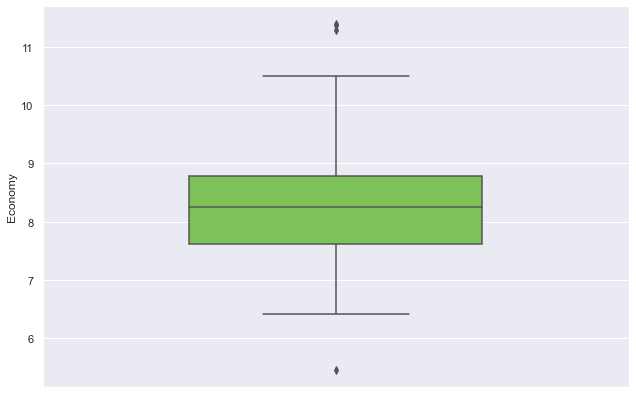

In [27]:
sns.boxplot(y = bowlers['Economy'],width=0.5,color='#79D246')

<AxesSubplot:ylabel='Bowling_Strike_Rate'>

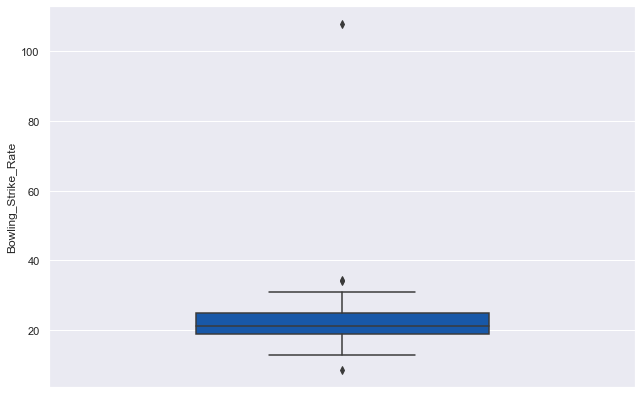

In [28]:
sns.boxplot(y = bowlers['Bowling_Strike_Rate'],width=0.5,color='#0055c0')

<AxesSubplot:ylabel='Bowling_average'>

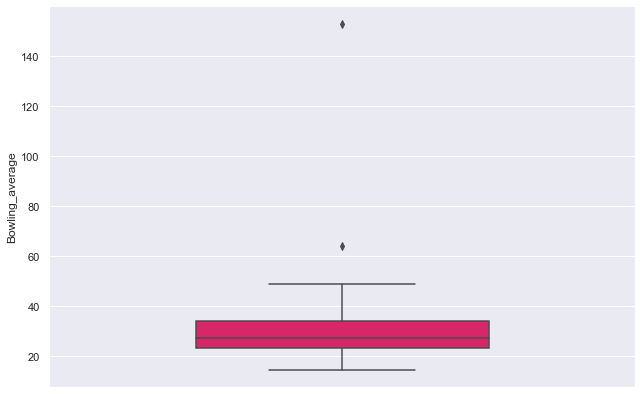

In [29]:
sns.boxplot(y = bowlers['Bowling_average'],width=0.5,color='#f50a60')

#### Dealing with outliers
In this section the outliers are seperated from the data (temporarily) to further cleaning 

Storing outliers in "temp" columns

In [30]:
bowlers['Bowling_average_temp']     =  outliers(bowlers,'Bowling_average')
bowlers['Bowling_Strike_Rate_temp'] =  outliers(bowlers,'Bowling_Strike_Rate')
bowlers['Economy_temp']             =  outliers(bowlers,'Economy')

#### Replacing missing data with mean
The missing data is replaced by the mean of the data (after ignoring the outliers) 

Filling mean in place of missing values in the respective columns

In [31]:
fill_mean(bowlers,'Bowling_average', 'Bowling_average_temp')
fill_mean(bowlers,'Bowling_Strike_Rate','Bowling_Strike_Rate_temp')
fill_mean(bowlers,'Economy','Economy_temp')

36     8.21
37     8.40
38     8.63
39     8.24
40     7.80
       ... 
210    8.78
214    6.82
215    7.42
230    6.97
234    7.65
Name: Economy, Length: 70, dtype: float64

In [32]:
bowlers.drop(['Bowling_average_temp', 'Bowling_Strike_Rate_temp','Economy_temp'], axis = 1, inplace = True)

Checking in case there is any missing value

In [33]:
bowlers.isnull().sum()

Player Name            0
Team                   0
Nationality            0
Player_Type            0
Capped                 0
Matches_Played         0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
dtype: int64

Visulazing "bowlers" DataFrame after pre-processing

<AxesSubplot:xlabel='Bowling_average', ylabel='Bowling_Strike_Rate'>

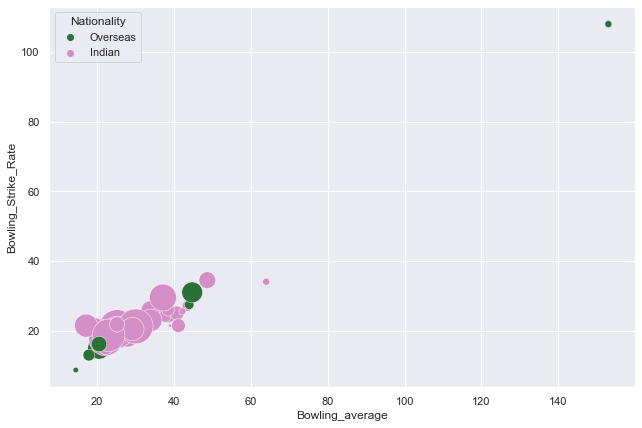

In [34]:
sns.set_theme(style = "darkgrid")
sns.set(rc={"figure.figsize":(10.5,7)})
sns.scatterplot(x=bowlers["Bowling_average"], y=bowlers["Bowling_Strike_Rate"], hue=bowlers['Nationality'], palette="cubehelix", s=10*bowlers['Matches_Played'])

### All Rounders

Creating an independent DataFrame "ar" consisting of all the Allrounders as per data

In [35]:
ar = seg(df,"Player_Type","Allrounder")
ar.sample(10)   

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
175,Ayush Bodani,Lucknow,Indian,Allrounder,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,Washington Sundar,Hyderabad,Indian,Allrounder,1,42.0,217.0,14.47,111.28,27.0,32.11,6.94,27.78,NaN,NaN,NaN
183,Ansh Patel,Punjab,Indian,Allrounder,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,Darshan Nalkande,Gujarat,Indian,Allrounder,0,22.0,73.0,7.30,85.90,43.0,12.80,7.25,10.60,NaN,NaN,NaN
172,Pravin Dubey,Delhi,Indian,Allrounder,0,22.0,126.0,14.00,102.40,20.0,22.30,7.13,18.80,NaN,NaN,NaN
156,Ripal Patel,Delhi,Indian,Allrounder,1,2.0,25.0,25.00,92.59,NaN,NaN,7.33,NaN,NaN,NaN,NaN
129,Dwayne Bravo,Chennai,Overseas,Allrounder,1,151.0,1537.0,22.94,130.25,167.0,24.32,8.36,17.44,NaN,NaN,NaN
223,Moeen Ali,Chennai,Overseas,Allrounder,1,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69,NaN,NaN,NaN
224,Venkatesh Iyer,Kolkata,Indian,Allrounder,1,10.0,370.0,41.11,128.47,3.0,23.00,8.12,17.00,NaN,NaN,NaN
170,Romario Shepherd,Hyderabad,Overseas,Allrounder,0,14.0,117.0,58.50,160.27,12.0,32.92,11.34,17.43,NaN,NaN,NaN


Dropping the irrelevent columns from "ar"

In [36]:
ar.drop(ar.columns[13:16],axis = 1, inplace = True)

Checking the missing(null) values in "ar"

In [37]:
ar.isnull().sum()

Player Name             0
Team                    0
Nationality             0
Player_Type             0
Capped                  0
Matches_Played         14
Runs                   15
Average                16
Strike_Rate            15
Wickets                21
Bowling_average        21
Economy                18
Bowling_Strike_Rate    21
dtype: int64

Inspecting the rows having missing data

In [38]:
ar.loc[ar.isnull().any(axis=1)]

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
140,Sarfaraz Khan,Delhi,Indian,Allrounder,1,40.0,441.0,23.21,138.21,NaN,NaN,NaN,NaN
141,Shahrukh Khan,Punjab,Indian,Allrounder,1,11.0,153.0,21.80,134.21,NaN,NaN,NaN,NaN
145,Harpreet Brar,Punjab,Indian,Allrounder,1,10.0,84.0,NaN,120.00,5.0,45.5,7.120,38.4
147,Liam Livingstone,Punjab,Overseas,Allrounder,1,9.0,112.0,14.00,125.84,NaN,NaN,NaN,NaN
152,Marco Jensen,Hyderabad,Overseas,Allrounder,1,2.0,NaN,NaN,NaN,2.0,22.5,7.500,18.0
156,Ripal Patel,Delhi,Indian,Allrounder,1,2.0,25.0,25.00,92.59,NaN,NaN,7.330,NaN
157,Yash Dhull,Delhi,Indian,Allrounder,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,N Tilak Varma,Mumbai,Indian,Allrounder,0,15.0,381.0,29.30,143.80,NaN,NaN,9.255,NaN
163,Raj Angad Bawa,Punjab,Indian,Allrounder,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,Rajvardhan Hangargekar,Chennai,Indian,Allrounder,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dropping rows having no data of parameters to analyse

In [39]:
ar.dropna(subset=ar.columns[5:13], how='all', inplace = True)

Performing the above step once again

In [40]:
ar.loc[ar.isnull().any(axis=1)]

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
140,Sarfaraz Khan,Delhi,Indian,Allrounder,1,40.0,441.0,23.21,138.21,NaN,NaN,NaN,NaN
141,Shahrukh Khan,Punjab,Indian,Allrounder,1,11.0,153.0,21.80,134.21,NaN,NaN,NaN,NaN
145,Harpreet Brar,Punjab,Indian,Allrounder,1,10.0,84.0,NaN,120.00,5.0,45.5,7.120,38.4
147,Liam Livingstone,Punjab,Overseas,Allrounder,1,9.0,112.0,14.00,125.84,NaN,NaN,NaN,NaN
152,Marco Jensen,Hyderabad,Overseas,Allrounder,1,2.0,NaN,NaN,NaN,2.0,22.5,7.500,18.0
156,Ripal Patel,Delhi,Indian,Allrounder,1,2.0,25.0,25.00,92.59,NaN,NaN,7.330,NaN
158,N Tilak Varma,Mumbai,Indian,Allrounder,0,15.0,381.0,29.30,143.80,NaN,NaN,9.255,NaN
180,Kyle Mayers,Lucknow,Overseas,Allrounder,0,4.0,96.0,32.00,160.00,NaN,NaN,10.000,NaN
199,Sai Sudharshan,Gujarat,Indian,Allrounder,0,7.0,177.0,35.40,116.40,NaN,NaN,NaN,NaN


Transforming (temporarily) absolute data of Runs & Wickets by taking into consideration the Matches Played. It is done for the purpose of finding mean

In [41]:
ar['Runs/Match'] = ar['Runs']/ar['Matches_Played']
ar['Wickets/Match'] = ar['Wickets']/ar['Matches_Played']

Storing outliers in "temp" columns as done in case of "bowlers" DataFrame. 
This is done to get "mean" that is not distorted due to outliers

In [42]:
ar['Economy_temp']             = outliers(ar,'Economy')
ar['Average_temp']             = outliers(ar,'Average')
ar['Bowling_Average_temp']     = outliers(ar,'Bowling_average')
ar['Strike_Rate_temp']         = outliers(ar,'Strike_Rate')
ar['Bowling_Strike_Rate_temp'] = outliers(ar,'Bowling_Strike_Rate')
ar['Runs/Match_temp']          = outliers(ar,'Runs/Match')
ar['Wickets/Match_temp']       = outliers(ar,'Wickets/Match')                              

Filling the missing data with mean values (outliers ignored to calculate mean)

In [43]:
fill_mean(ar,'Bowling_Strike_Rate','Bowling_Strike_Rate_temp')
fill_mean(ar,'Strike_Rate','Strike_Rate_temp')
fill_mean(ar,'Bowling_average','Bowling_Average_temp')
fill_mean(ar,'Average','Average_temp')
fill_mean(ar,'Economy','Economy_temp')
fill_mean(ar,'Runs/Match','Runs/Match')
fill_mean(ar, 'Wickets/Match', 'Wickets/Match')

127    0.87
128    1.03
129    1.11
130    0.09
131    1.35
       ... 
223    0.47
224    0.30
226    0.87
232    1.07
233    0.37
Name: Wickets/Match, Length: 73, dtype: float64

In [44]:
ar.sample(10)

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,...,Bowling_Strike_Rate,Runs/Match,Wickets/Match,Economy_temp,Average_temp,Bowling_Average_temp,Strike_Rate_temp,Bowling_Strike_Rate_temp,Runs/Match_temp,Wickets/Match_temp
160,Anukul Roy,Kolkata,Indian,Allrounder,0,31.0,304.0,21.70,141.40,19.0,...,30.90,9.81,0.61,7.09,21.70,36.50,141.40,30.90,9.806452,0.612903
128,Pat Cummins,Kolkata,Overseas,Allrounder,1,37.0,316.0,19.75,140.44,38.0,...,21.95,8.54,1.03,8.24,19.75,30.13,140.44,21.95,8.540541,1.027027
168,Sherfane Rutherford,Bangalore,Overseas,Allrounder,1,7.0,73.0,14.60,135.19,1.0,...,41.00,10.43,0.14,8.63,14.60,NaN,135.19,41.00,10.428571,0.142857
161,Darshan Nalkande,Gujarat,Indian,Allrounder,0,22.0,73.0,7.30,85.90,43.0,...,10.60,3.32,1.95,7.25,7.30,12.80,85.90,10.60,3.318182,NaN
171,Tim David,Mumbai,Overseas,Allrounder,0,11.0,429.0,47.67,157.72,5.0,...,32.80,39.00,0.45,9.33,NaN,51.00,157.72,32.80,NaN,0.454545
127,Ravichandran Ashwin,Rajasthan,Indian,Allrounder,1,167.0,456.0,11.12,109.88,145.0,...,24.12,2.73,0.87,6.91,11.12,27.80,109.88,24.12,2.730539,0.868263
132,Harshal Patel,Bangalore,Indian,Allrounder,1,63.0,187.0,11.00,134.53,78.0,...,16.21,2.97,1.24,8.58,11.00,23.18,134.53,16.21,2.968254,1.238095
144,Kamlesh Nagarkoti,Delhi,Indian,Allrounder,1,11.0,22.0,5.50,66.67,5.0,...,33.60,2.00,0.45,9.14,5.50,51.20,NaN,33.60,2.000000,0.454545
141,Shahrukh Khan,Punjab,Indian,Allrounder,1,11.0,153.0,21.80,134.21,NaN,...,22.62,13.91,0.65,NaN,21.80,NaN,134.21,NaN,13.909091,NaN
162,Sanjay Yadav,Mumbai,Indian,Allrounder,0,27.0,494.0,27.40,124.10,16.0,...,27.10,18.30,0.59,6.65,27.40,27.90,124.10,27.10,18.296296,0.592593


Re-transforming Runs & Wicket columns after handling the missing data

In [45]:
ar['Runs'] = ar['Runs/Match']*ar['Matches_Played']
ar['Wickets'] = ar['Wickets/Match']*ar['Matches_Played']

Dropping all the temporary columns that were created weren't part of original DataFrame

In [46]:
ar.drop(['Bowling_Strike_Rate_temp','Strike_Rate_temp','Bowling_Average_temp','Average_temp','Economy_temp',
        'Runs/Match_temp','Wickets/Match_temp','Runs/Match','Wickets/Match'], axis = 1, inplace = True)

Now there is no missing value present in the "ar" DataFrame

In [47]:
ar.isnull().sum()

Player Name            0
Team                   0
Nationality            0
Player_Type            0
Capped                 0
Matches_Played         0
Runs                   0
Average                0
Strike_Rate            0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
dtype: int64

Visualizing the dataFrame after pre-processing based on batting & bowling respectively

<AxesSubplot:xlabel='Average', ylabel='Strike_Rate'>

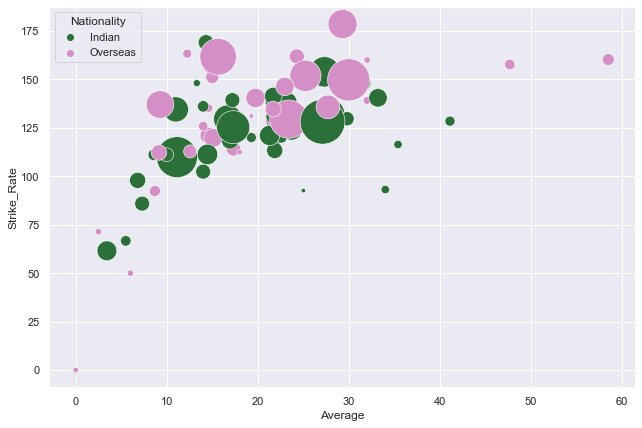

In [48]:
sns.set_theme(style = "darkgrid")
sns.set(rc={"figure.figsize":(10.5,7)})
sns.scatterplot(x=ar["Average"], y=ar["Strike_Rate"], hue=ar['Nationality'], palette="cubehelix", s=10*ar['Matches_Played'])

<AxesSubplot:xlabel='Bowling_average', ylabel='Bowling_Strike_Rate'>

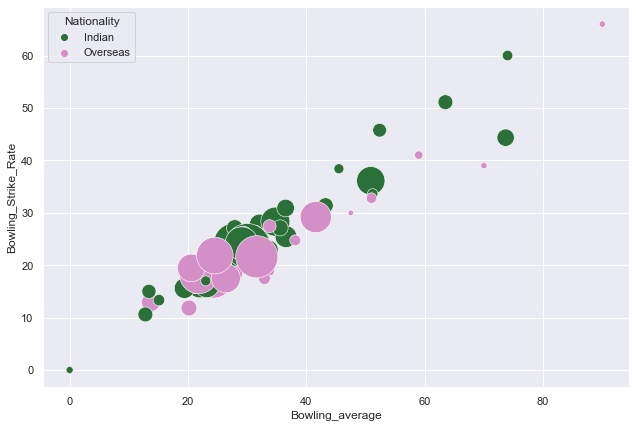

In [49]:
sns.set_theme(style = "darkgrid")
sns.set(rc={"figure.figsize":(10.5,7)})
sns.scatterplot(x=ar["Bowling_average"], y=ar["Bowling_Strike_Rate"], hue=ar['Nationality'], palette="cubehelix",s=10*ar['Matches_Played'])

### WicketKeeper

Creating an independent DataFrame specifically for Player_Type "Keeper" as "wk"

In [50]:
wk = seg(df,"Player_Type","Keeper")
wk.sample(5)

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
115,Jitesh Sharma,Punjab,Indian,Keeper,0,54.0,1329.0,28.3,141.8,NaN,NaN,NaN,NaN,38.0,5.0,8.0
123,Tim Seifert,Delhi,Overseas,Keeper,0,40.0,753.0,23.5,129.8,NaN,NaN,NaN,NaN,21.0,4.0,6.0
121,Vishnu Vinod,Hyderabad,Indian,Keeper,1,3.0,19.0,6.3,73.1,NaN,NaN,NaN,NaN,0.0,0.0,2.0
120,N Jagadeesan,Chennai,Indian,Keeper,1,5.0,33.0,16.5,113.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,Baba Indrajith,Kolkata,Indian,Keeper,0,20.0,319.0,19.9,104.6,NaN,NaN,NaN,NaN,6.0,1.0,0.0


Removing irrelevent columns from the data

In [51]:
wk.drop(wk.columns[9:13],axis = 1 ,inplace = True)

Checking the missing values in "wk" 

In [52]:
wk.isnull().sum()

Player Name       0
Team              0
Nationality       0
Player_Type       0
Capped            0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
Catches           1
Run_outs          1
Stumps            1
dtype: int64

Locating & dropping the row having missing data and hence have no requirement in analysis

In [53]:
wk.loc[wk.isnull().any(axis=1)]
wk.dropna(subset=wk.columns[9:12], how='all', inplace = True)

Updating the wk parameters by standardizing them to "per match"

In [54]:
wk['Stumps/Match'] =  round(wk['Stumps']/wk['Matches_Played'],2)
wk['Catches/Match'] = round(wk['Catches']/wk['Matches_Played'],2)
wk['Run_outs/Match'] = round(wk['Run_outs']/wk['Matches_Played'],2)

Dropping the columns that are no more required

In [55]:
wk.drop(['Stumps','Catches','Run_outs'], axis=1, inplace = True)
wk

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Stumps/Match,Catches/Match,Run_outs/Match
105,Quinton De Kock,Lucknow,Overseas,Keeper,1,77.0,2256.0,31.30,130.90,0.18,0.69,0.00
106,Ambati Rayudu,Chennai,Indian,Keeper,1,175.0,3916.0,29.40,127.50,0.01,0.33,0.07
107,Ishan Kishan,Mumbai,Indian,Keeper,1,61.0,1452.0,28.50,136.30,0.03,0.31,0.02
108,Jonny Bairstow,Punjab,Overseas,Keeper,1,28.0,1038.0,41.50,142.20,0.14,0.64,0.04
109,Dinesh Karthik,Bangalore,Indian,Keeper,1,213.0,4046.0,25.80,129.70,0.15,0.58,0.07
110,Nicholas Pooran,Hyderabad,Overseas,Keeper,1,33.0,606.0,22.40,155.00,0.00,0.33,0.09
111,KS Bharat,Delhi,Indian,Keeper,1,8.0,191.0,38.20,122.40,0.12,0.50,0.00
112,Anuj Rawat,Bangalore,Indian,Keeper,1,1.0,0.0,0.00,0.00,0.00,3.00,0.00
113,Prabhsimran Singh,Punjab,Indian,Keeper,1,5.0,50.0,10.00,90.90,0.00,0.40,0.00
114,Sheldon Jackson,Kolkata,Overseas,Keeper,1,4.0,38.0,19.00,122.60,0.00,0.50,0.00


This marks the end of Data Cleaning & Transformation process now in the 2nd part of this project players will be selected

# Selecting Players based on various criteria

### 1) Segregating Players based on Nationality & Capped

In [56]:
frgn_batters      = seg(batters,'Nationality','Overseas') 
frgn_batters      = seg(frgn_batters,'Capped',1)

frgn_bowlers      = seg(bowlers,'Nationality','Overseas')
frgn_bowlers      = seg(frgn_bowlers,'Capped',1)

frgn_ar           = seg(ar,'Nationality','Overseas')
frgn_ar           = seg(frgn_ar,'Capped',1)

ind_batters       = seg(batters,'Nationality','Indian')
ind_cap_batters   = seg(ind_batters,'Capped',1)
ind_uncap_batters = seg(ind_batters,'Capped',0)

ind_bowlers       = seg(bowlers,'Nationality','Indian')
ind_cap_bowlers   = seg(ind_bowlers,'Capped',1)
ind_uncap_bowlers = seg(ind_bowlers,'Capped',0)

ind_ar            = seg(ar,'Nationality','Indian')
ind_cap_ar        = seg(ind_ar,'Capped',1)
ind_uncap_ar      = seg(ind_ar,'Capped',0)

## Batters rules for to be selected in the squad
Foreign         : 3
Indian Capped   : 3
Indian Uncapped : 2
Total           : 8

## Foreign Batters 

In [57]:
frgn_batters.sample(5)

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate
30,Evin Lewis,Lucknow,Overseas,Batter,1,21.0,581.0,27.67,138.00
2,Faf Du Plessis,Bangalore,Overseas,Batter,1,100.0,2935.0,34.94,131.09
207,Kane Williamson,Hyderabad,Overseas,Batter,1,63.0,1885.0,40.11,131.27
26,David Miller,Gujarat,Overseas,Batter,1,89.0,1974.0,32.90,136.51
4,Shimron Hetmyer,Rajasthan,Overseas,Batter,1,31.0,517.0,25.85,151.17


Short-listing based on matches played

In [58]:
frgn_batters = short_list(frgn_batters)
frgn_batters

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate
2,Faf Du Plessis,Bangalore,Overseas,Batter,1,100.0,2935.0,34.94,131.09
4,Shimron Hetmyer,Rajasthan,Overseas,Batter,1,31.0,517.0,25.85,151.17
19,David Warner,Delhi,Overseas,Batter,1,150.0,5449.0,41.60,139.97
26,David Miller,Gujarat,Overseas,Batter,1,89.0,1974.0,32.90,136.51
207,Kane Williamson,Hyderabad,Overseas,Batter,1,63.0,1885.0,40.11,131.27


In [59]:
batters_sum_rank(frgn_batters)

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,rank_avg,rank_sr,sum_rank
19,David Warner,Delhi,Overseas,Batter,1,150.0,5449.0,41.60,139.97,1.0,2.0,3.0
4,Shimron Hetmyer,Rajasthan,Overseas,Batter,1,31.0,517.0,25.85,151.17,5.0,1.0,6.0
207,Kane Williamson,Hyderabad,Overseas,Batter,1,63.0,1885.0,40.11,131.27,2.0,4.0,6.0
26,David Miller,Gujarat,Overseas,Batter,1,89.0,1974.0,32.90,136.51,4.0,3.0,7.0
2,Faf Du Plessis,Bangalore,Overseas,Batter,1,100.0,2935.0,34.94,131.09,3.0,5.0,8.0


Visulizing the data for foreign batters on scatter plot
- Here players are also differentiated on the basis of the team they are part of 

<AxesSubplot:xlabel='Average', ylabel='Strike_Rate'>

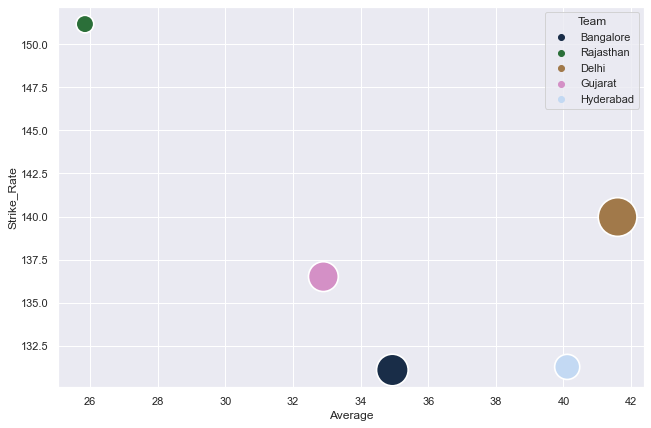

In [60]:
sns.set_theme(style = "darkgrid")
sns.set(rc={"figure.figsize":(10.5,7)})
sns.scatterplot(x=frgn_batters["Average"], y=frgn_batters["Strike_Rate"], hue = frgn_batters["Team"], palette="cubehelix", s=10*frgn_batters['Matches_Played'])

List of three players selected after analyzing the data

In [61]:
frgn_batters_squad = batters.loc[[19,207,4]]
frgn_batters_squad

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate
19,David Warner,Delhi,Overseas,Batter,1,150.0,5449.0,41.60,139.97
207,Kane Williamson,Hyderabad,Overseas,Batter,1,63.0,1885.0,40.11,131.27
4,Shimron Hetmyer,Rajasthan,Overseas,Batter,1,31.0,517.0,25.85,151.17


## Indian Capped Batters 

In [62]:
ind_cap_batters.sample(5)

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate
15,Mandeep Singh,Delhi,Indian,Batter,1,105.0,1674.0,22.00,124.00
5,Robin Uthappa,Chenai,Indian,Batter,1,193.0,4722.0,27.94,130.15
220,Mayank Agarwal,Punjab,Indian,Batter,1,100.0,2135.0,23.46,135.73
208,Virat Kohli,Bangalore,Indian,Batter,1,207.0,6283.0,37.40,129.95
231,Ruturaj Gaikwad,Chennai,Indian,Batter,1,22.0,839.0,46.61,132.13


Short-listing indian capped players based on matches played

In [63]:
ind_cap_batters = short_list(ind_cap_batters)
ind_cap_batters

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate
0,Shikhar Dhawan,Punjab,Indian,Batter,1,192.0,5783.0,34.63,126.60
1,Shreyas Iyer,Kolkata,Indian,Batter,1,87.0,2375.0,31.67,123.96
3,Manish Pandey,Lucknow,Indian,Batter,1,154.0,3560.0,30.69,121.83
5,Robin Uthappa,Chenai,Indian,Batter,1,193.0,4722.0,27.94,130.15
14,Ajinkya Rahane,Kolkata,Indian,Batter,1,151.0,3941.0,31.53,121.34
15,Mandeep Singh,Delhi,Indian,Batter,1,105.0,1674.0,22.00,124.00
31,Karun Nair,Rajasthan,Indian,Batter,1,73.0,1480.0,24.26,128.63
205,Rohit Sharma,Mumbai,Indian,Batter,1,213.0,5611.0,31.17,130.40
208,Virat Kohli,Bangalore,Indian,Batter,1,207.0,6283.0,37.40,129.95
212,KL Rahul,Lucknow,Indian,Batter,1,94.0,3273.0,47.43,136.38


Sorting the batters based on cumalative rankings

In [64]:
batters_sum_rank(ind_cap_batters)

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,rank_avg,rank_sr,sum_rank
212,KL Rahul,Lucknow,Indian,Batter,1,94.0,3273.0,47.43,136.38,1.0,1.0,2.0
208,Virat Kohli,Bangalore,Indian,Batter,1,207.0,6283.0,37.40,129.95,2.0,6.0,8.0
205,Rohit Sharma,Mumbai,Indian,Batter,1,213.0,5611.0,31.17,130.40,6.0,4.0,10.0
0,Shikhar Dhawan,Punjab,Indian,Batter,1,192.0,5783.0,34.63,126.60,3.0,8.0,11.0
225,Suryakumar Yadav,Mumbai,Indian,Batter,1,115.0,2341.0,28.90,135.71,8.0,3.0,11.0
220,Mayank Agarwal,Punjab,Indian,Batter,1,100.0,2135.0,23.46,135.73,11.0,2.0,13.0
1,Shreyas Iyer,Kolkata,Indian,Batter,1,87.0,2375.0,31.67,123.96,4.0,10.0,14.0
5,Robin Uthappa,Chenai,Indian,Batter,1,193.0,4722.0,27.94,130.15,9.0,5.0,14.0
14,Ajinkya Rahane,Kolkata,Indian,Batter,1,151.0,3941.0,31.53,121.34,5.0,12.0,17.0
31,Karun Nair,Rajasthan,Indian,Batter,1,73.0,1480.0,24.26,128.63,10.0,7.0,17.0


Visualizing the batters based on parameters & differentiated according to the team they play for

<AxesSubplot:xlabel='Average', ylabel='Strike_Rate'>

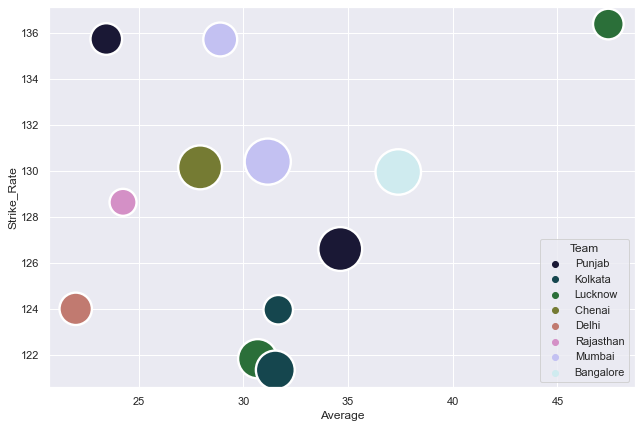

In [65]:
sns.set_theme(style = "darkgrid")
sns.set(rc={"figure.figsize":(10.5,7)})
sns.scatterplot(x=ind_cap_batters["Average"], y=ind_cap_batters["Strike_Rate"], hue=ind_cap_batters['Team'], palette="cubehelix", s=10*ind_cap_batters['Matches_Played'])

Top three indian batters selected for the best squad based on data

In [66]:
ind_cap_batters_squad = batters.loc[([212,208,205])]
ind_cap_batters_squad

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate
212,KL Rahul,Lucknow,Indian,Batter,1,94.0,3273.0,47.43,136.38
208,Virat Kohli,Bangalore,Indian,Batter,1,207.0,6283.0,37.40,129.95
205,Rohit Sharma,Mumbai,Indian,Batter,1,213.0,5611.0,31.17,130.40


## Indian Uncapped Batters

In [67]:
ind_uncap_batters.sample(5)

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate
27,C Hari Nishaanth,Chennai,Indian,Batter,0,27.0,593.0,26.9,124.8
24,Abhijeet Tomar,Kolkata,Indian,Batter,0,5.0,65.0,13.0,73.0
9,Abhinav Sadarangani,Gujarat,Indian,Batter,0,4.0,162.0,54.0,150.0
33,Rahul Buddhi,Mumbai,Indian,Batter,0,12.0,222.0,31.7,136.2
25,Pratham Singh,Kolkata,Indian,Batter,0,27.0,829.0,33.2,127.7


Short listing players based on matches played

In [68]:
ind_uncap_batters = short_list(ind_uncap_batters)
ind_uncap_batters

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate
11,Ashwin Hebbar,Delhi,Indian,Batter,0,41.0,1117.0,34.9,125.1
22,Subhranshu Senapati,Chennai,Indian,Batter,0,26.0,637.0,28.9,122.3
25,Pratham Singh,Kolkata,Indian,Batter,0,27.0,829.0,33.2,127.7
27,C Hari Nishaanth,Chennai,Indian,Batter,0,27.0,593.0,26.9,124.8


In [69]:
batters_sum_rank(ind_uncap_batters)

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,rank_avg,rank_sr,sum_rank
11,Ashwin Hebbar,Delhi,Indian,Batter,0,41.0,1117.0,34.9,125.1,1.0,2.0,3.0
25,Pratham Singh,Kolkata,Indian,Batter,0,27.0,829.0,33.2,127.7,2.0,1.0,3.0
22,Subhranshu Senapati,Chennai,Indian,Batter,0,26.0,637.0,28.9,122.3,3.0,4.0,7.0
27,C Hari Nishaanth,Chennai,Indian,Batter,0,27.0,593.0,26.9,124.8,4.0,3.0,7.0


Visualizing the indian uncapped batters on a scatterplot 

<AxesSubplot:xlabel='Average', ylabel='Strike_Rate'>

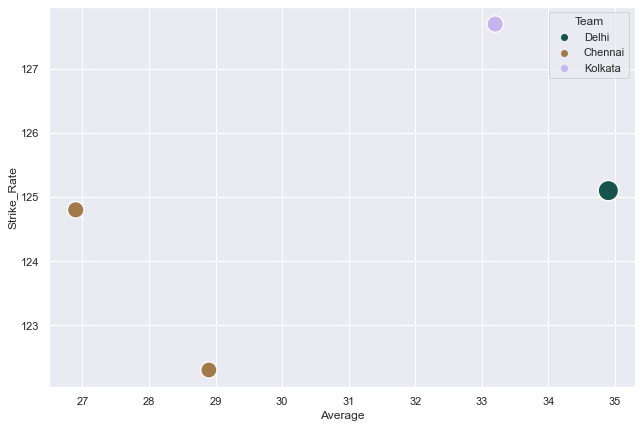

In [70]:
sns.set_theme(style = "darkgrid")
sns.set(rc={"figure.figsize":(10.5,7)})
sns.scatterplot(x=ind_uncap_batters["Average"], y=ind_uncap_batters["Strike_Rate"], hue=ind_uncap_batters['Team'], palette="cubehelix", s=10*ind_uncap_batters['Matches_Played'])

Top two players selected for the squad

In [71]:
ind_uncap_batters_squad = batters.loc[([11,25])]
ind_uncap_batters_squad

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate
11,Ashwin Hebbar,Delhi,Indian,Batter,0,41.0,1117.0,34.9,125.1
25,Pratham Singh,Kolkata,Indian,Batter,0,27.0,829.0,33.2,127.7


# Selecting Bowlers (9)

## Foreign Bowlers (3)

In [72]:
frgn_bowlers.head()

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
36,Kagiso Rabada,Punjab,Overseas,Bowler,1,50.0,76.0,20.53,8.21,15.00
37,Trent Boult,Rajasthan,Overseas,Bowler,1,62.0,76.0,26.09,8.40,18.64
42,Lockei Ferguson,Gujarat,Overseas,Bowler,1,22.0,24.0,27.00,8.12,19.96
43,Josh Hazlewood,Bangalore,Overseas,Bowler,1,12.0,12.0,29.75,7.93,22.50
47,Mustafizur Rahman,Delhi,Overseas,Bowler,1,38.0,38.0,29.50,7.84,22.58


In [73]:
frgn_bowlers = short_list(frgn_bowlers)
frgn_bowlers

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
36,Kagiso Rabada,Punjab,Overseas,Bowler,1,50.0,76.0,20.53,8.21,15.00
37,Trent Boult,Rajasthan,Overseas,Bowler,1,62.0,76.0,26.09,8.40,18.64
42,Lockei Ferguson,Gujarat,Overseas,Bowler,1,22.0,24.0,27.00,8.12,19.96
47,Mustafizur Rahman,Delhi,Overseas,Bowler,1,38.0,38.0,29.50,7.84,22.58
66,Dushmanta Chameera,Lucknow,Overseas,Bowler,1,41.0,42.0,27.21,7.92,20.62
99,Tim Southee,Kolkata,Overseas,Bowler,1,43.0,31.0,44.77,8.68,30.97
103,Nathan Coulter-Nile,Rajasthan,Overseas,Bowler,1,38.0,48.0,21.92,7.52,17.48
234,Anrich Nortje,Delhi,Overseas,Bowler,1,24.0,34.0,20.56,7.65,16.12


In [74]:
bowler_sum_rank(frgn_bowlers)

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,rank_eco,rank_bavg,rank_bsr,sum_rank
234,Anrich Nortje,Delhi,Overseas,Bowler,1,24.0,34.0,20.56,7.65,16.12,2.0,2.0,2.0,6.0
103,Nathan Coulter-Nile,Rajasthan,Overseas,Bowler,1,38.0,48.0,21.92,7.52,17.48,1.0,3.0,3.0,7.0
36,Kagiso Rabada,Punjab,Overseas,Bowler,1,50.0,76.0,20.53,8.21,15.00,6.0,1.0,1.0,8.0
37,Trent Boult,Rajasthan,Overseas,Bowler,1,62.0,76.0,26.09,8.40,18.64,7.0,4.0,4.0,15.0
42,Lockei Ferguson,Gujarat,Overseas,Bowler,1,22.0,24.0,27.00,8.12,19.96,5.0,5.0,5.0,15.0
66,Dushmanta Chameera,Lucknow,Overseas,Bowler,1,41.0,42.0,27.21,7.92,20.62,4.0,6.0,6.0,16.0
47,Mustafizur Rahman,Delhi,Overseas,Bowler,1,38.0,38.0,29.50,7.84,22.58,3.0,7.0,7.0,17.0
99,Tim Southee,Kolkata,Overseas,Bowler,1,43.0,31.0,44.77,8.68,30.97,8.0,8.0,8.0,24.0


In [75]:
frgn_bowlers

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,rank_eco,rank_bavg,rank_bsr,sum_rank
36,Kagiso Rabada,Punjab,Overseas,Bowler,1,50.0,76.0,20.53,8.21,15.00,6.0,1.0,1.0,8.0
37,Trent Boult,Rajasthan,Overseas,Bowler,1,62.0,76.0,26.09,8.40,18.64,7.0,4.0,4.0,15.0
42,Lockei Ferguson,Gujarat,Overseas,Bowler,1,22.0,24.0,27.00,8.12,19.96,5.0,5.0,5.0,15.0
47,Mustafizur Rahman,Delhi,Overseas,Bowler,1,38.0,38.0,29.50,7.84,22.58,3.0,7.0,7.0,17.0
66,Dushmanta Chameera,Lucknow,Overseas,Bowler,1,41.0,42.0,27.21,7.92,20.62,4.0,6.0,6.0,16.0
99,Tim Southee,Kolkata,Overseas,Bowler,1,43.0,31.0,44.77,8.68,30.97,8.0,8.0,8.0,24.0
103,Nathan Coulter-Nile,Rajasthan,Overseas,Bowler,1,38.0,48.0,21.92,7.52,17.48,1.0,3.0,3.0,7.0
234,Anrich Nortje,Delhi,Overseas,Bowler,1,24.0,34.0,20.56,7.65,16.12,2.0,2.0,2.0,6.0


<AxesSubplot:xlabel='Bowling_average', ylabel='Bowling_Strike_Rate'>

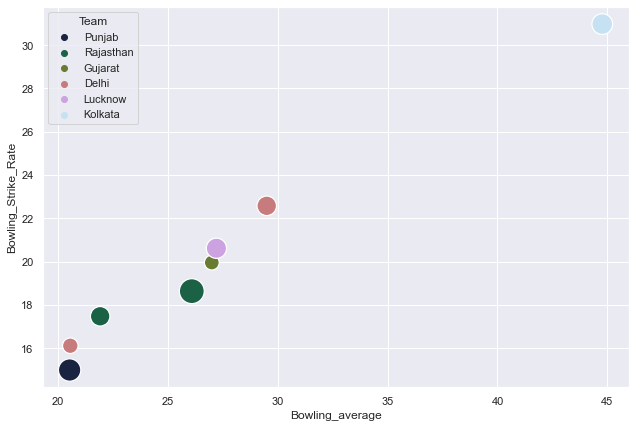

In [76]:
sns.set_theme(style = "darkgrid")
sns.set(rc={"figure.figsize":(10.5,7)})
sns.scatterplot(x=frgn_bowlers["Bowling_average"], y=frgn_bowlers["Bowling_Strike_Rate"], hue=frgn_bowlers['Team'], palette="cubehelix", s=10*frgn_bowlers['Matches_Played'])

In [77]:
frgn_bowlers_squad = bowlers.loc[[234,103,36]]

In [78]:
frgn_bowlers_squad

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
234,Anrich Nortje,Delhi,Overseas,Bowler,1,24.0,34.0,20.56,7.65,16.12
103,Nathan Coulter-Nile,Rajasthan,Overseas,Bowler,1,38.0,48.0,21.92,7.52,17.48
36,Kagiso Rabada,Punjab,Overseas,Bowler,1,50.0,76.0,20.53,8.21,15.00


## Ind Capped Bowlers (4)

In [79]:
ind_cap_bowlers.sample(5)

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
61,KC Cariappa,Rajasthan,Indian,Bowler,1,11.0,8.0,43.50,9.67,27.00
39,T Natarajan,Hyderabad,Indian,Bowler,1,24.0,20.0,34.40,8.24,25.05
70,Jaydev Unadkat,Mumbai,Indian,Bowler,1,86.0,85.0,30.45,8.74,20.89
69,Navdeep Saini,Rajasthan,Indian,Bowler,1,28.0,17.0,48.71,8.48,34.47
68,Sandeep Sharma,Punjab,Indian,Bowler,1,99.0,112.0,25.44,7.78,19.62


In [80]:
ind_cap_bowlers = short_list(ind_cap_bowlers)
ind_cap_bowlers

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
38,Mohammad Shami,Gujarat,Indian,Bowler,1,77.0,79.0,30.41,8.63,21.14
40,Deepak Chahar,Chennai,Indian,Bowler,1,63.0,59.0,29.19,7.80,22.44
41,Prasidh Krishna,Rajasthan,Indian,Bowler,1,34.0,30.0,38.40,9.27,24.87
45,Bhuvneshwar Kumar,Hyderabad,Indian,Bowler,1,132.0,142.0,25.27,7.30,20.77
46,Shardul Thakur,Delhi,Indian,Bowler,1,61.0,67.0,27.87,8.89,18.81
48,Kuldeep Yadav,Delhi,Indian,Bowler,1,45.0,40.0,30.90,8.28,22.40
49,Rahul Chahar,Punjab,Indian,Bowler,1,42.0,43.0,25.98,7.45,20.93
50,Yuzvendra Chahal,Rajasthan,Indian,Bowler,1,114.0,139.0,22.28,7.59,17.61
58,Ankit Singh Rajpoot,Lucknow,Indian,Bowler,1,29.0,24.0,33.92,9.23,22.04
60,Murugan Ashwin,Mumbai,Indian,Bowler,1,34.0,26.0,33.88,7.87,25.85


In [81]:
bowler_sum_rank(ind_cap_bowlers)

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,rank_eco,rank_bavg,rank_bsr,sum_rank
215,Jasprit Bumrah,Mumbai,Indian,Bowler,1,106.0,130.0,23.05,7.42,18.63,3.0,2.0,2.0,7.0
50,Yuzvendra Chahal,Rajasthan,Indian,Bowler,1,114.0,139.0,22.28,7.59,17.61,6.0,1.0,1.0,8.0
214,Varun Chakravarthy,Kolkata,Indian,Bowler,1,31.0,36.0,23.31,6.82,20.50,1.0,3.0,7.0,11.0
45,Bhuvneshwar Kumar,Hyderabad,Indian,Bowler,1,132.0,142.0,25.27,7.30,20.77,2.0,4.0,8.0,14.0
68,Sandeep Sharma,Punjab,Indian,Bowler,1,99.0,112.0,25.44,7.78,19.62,7.0,5.0,5.0,17.0
49,Rahul Chahar,Punjab,Indian,Bowler,1,42.0,43.0,25.98,7.45,20.93,4.0,6.0,10.0,20.0
62,Shreyas Gopal,Hyderabad,Indian,Bowler,1,48.0,48.0,25.98,8.04,19.40,10.0,6.0,4.0,20.0
46,Shardul Thakur,Delhi,Indian,Bowler,1,61.0,67.0,27.87,8.89,18.81,16.0,7.0,3.0,26.0
104,Siddharth Kaul,Bangalore,Indian,Bowler,1,54.0,58.0,29.24,8.59,20.43,13.0,9.0,6.0,28.0
40,Deepak Chahar,Chennai,Indian,Bowler,1,63.0,59.0,29.19,7.80,22.44,8.0,8.0,15.0,31.0


In [82]:
ind_cap_bowlers_squad = bowlers.loc[[215,50,214,45]]
ind_cap_bowlers_squad 

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
215,Jasprit Bumrah,Mumbai,Indian,Bowler,1,106.0,130.0,23.05,7.42,18.63
50,Yuzvendra Chahal,Rajasthan,Indian,Bowler,1,114.0,139.0,22.28,7.59,17.61
214,Varun Chakravarthy,Kolkata,Indian,Bowler,1,31.0,36.0,23.31,6.82,20.50
45,Bhuvneshwar Kumar,Hyderabad,Indian,Bowler,1,132.0,142.0,25.27,7.30,20.77


## Ind Uncapped Bowlers (2)

In [83]:
ind_uncap_bowlers

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
53,Akash Deep,Bangalore,Indian,Bowler,0,22.0,26.0,18.50,6.42,21.42
54,KM Saif,Chennai,Indian,Bowler,0,3.0,4.0,23.20,11.38,21.42
64,R Sai Kishore,Gujarat,Indian,Bowler,0,38.0,43.0,17.40,5.46,21.42
74,Yash Dayal,Gujarat,Indian,Bowler,0,15.0,15.0,22.10,7.21,21.42
75,Simarjeet Singh,Chennai,Indian,Bowler,0,20.0,24.0,20.40,7.45,21.42
81,Vaibhav Arora,Punjab,Indian,Bowler,0,12.0,12.0,25.20,6.96,21.42
82,Mukesh Choudhary,Chennai,Indian,Bowler,0,12.0,16.0,22.90,8.50,21.42
84,Mohsin Khan,Lucknow,Indian,Bowler,0,26.0,33.0,19.30,7.08,21.42
85,Chama Milind,Bangalore,Indian,Bowler,0,53.0,83.0,17.20,7.63,21.42
90,Baltej Dhanda,Punjab,Indian,Bowler,0,22.0,26.0,24.50,7.81,21.42


In [84]:
ind_uncap_bowlers = short_list(ind_uncap_bowlers)
ind_uncap_bowlers

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
53,Akash Deep,Bangalore,Indian,Bowler,0,22.0,26.0,18.5,6.42,21.42
64,R Sai Kishore,Gujarat,Indian,Bowler,0,38.0,43.0,17.4,5.46,21.42
75,Simarjeet Singh,Chennai,Indian,Bowler,0,20.0,24.0,20.4,7.45,21.42
84,Mohsin Khan,Lucknow,Indian,Bowler,0,26.0,33.0,19.3,7.08,21.42
85,Chama Milind,Bangalore,Indian,Bowler,0,53.0,83.0,17.2,7.63,21.42
90,Baltej Dhanda,Punjab,Indian,Bowler,0,22.0,26.0,24.5,7.81,21.42


In [85]:
bowler_sum_rank(ind_cap_bowlers)

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,rank_eco,rank_bavg,rank_bsr,sum_rank
215,Jasprit Bumrah,Mumbai,Indian,Bowler,1,106.0,130.0,23.05,7.42,18.63,3.0,2.0,2.0,7.0
50,Yuzvendra Chahal,Rajasthan,Indian,Bowler,1,114.0,139.0,22.28,7.59,17.61,6.0,1.0,1.0,8.0
214,Varun Chakravarthy,Kolkata,Indian,Bowler,1,31.0,36.0,23.31,6.82,20.50,1.0,3.0,7.0,11.0
45,Bhuvneshwar Kumar,Hyderabad,Indian,Bowler,1,132.0,142.0,25.27,7.30,20.77,2.0,4.0,8.0,14.0
68,Sandeep Sharma,Punjab,Indian,Bowler,1,99.0,112.0,25.44,7.78,19.62,7.0,5.0,5.0,17.0
49,Rahul Chahar,Punjab,Indian,Bowler,1,42.0,43.0,25.98,7.45,20.93,4.0,6.0,10.0,20.0
62,Shreyas Gopal,Hyderabad,Indian,Bowler,1,48.0,48.0,25.98,8.04,19.40,10.0,6.0,4.0,20.0
46,Shardul Thakur,Delhi,Indian,Bowler,1,61.0,67.0,27.87,8.89,18.81,16.0,7.0,3.0,26.0
104,Siddharth Kaul,Bangalore,Indian,Bowler,1,54.0,58.0,29.24,8.59,20.43,13.0,9.0,6.0,28.0
40,Deepak Chahar,Chennai,Indian,Bowler,1,63.0,59.0,29.19,7.80,22.44,8.0,8.0,15.0,31.0


In [86]:
ind_uncap_bowlers_squad = bowlers.loc[[64,53]]
ind_uncap_bowlers_squad

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
64,R Sai Kishore,Gujarat,Indian,Bowler,0,38.0,43.0,17.4,5.46,21.42
53,Akash Deep,Bangalore,Indian,Bowler,0,22.0,26.0,18.5,6.42,21.42


# Selecting All-Rounders (5)

## Foreign All Rounders (2)

In [87]:
frgn_ar = short_list(frgn_ar)
frgn_ar

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
128,Pat Cummins,Kolkata,Overseas,Allrounder,1,37.0,315.98,19.75,140.44,38.11,30.13,8.24,21.95
129,Dwayne Bravo,Chennai,Overseas,Allrounder,1,151.0,1537.18,22.94,130.25,167.61,24.32,8.36,17.44
131,Jason Holder,Lucknow,Overseas,Allrounder,1,26.0,189.02,14.54,121.15,35.10,22.46,8.20,16.43
165,Jofra Archer,Mumbai,Overseas,Allrounder,1,35.0,194.95,15.00,157.26,45.85,21.33,7.13,17.93
204,Andre Russell,Kolkata,Overseas,Allrounder,1,84.0,1700.16,29.31,178.57,72.24,26.40,9.05,17.51
218,Glen Maxwell,Bangalore,Overseas,Allrounder,1,97.0,2017.60,25.23,151.84,22.31,41.59,8.55,29.18
221,Rashid Khan,Gujarat,Overseas,Allrounder,1,76.0,221.92,9.26,137.04,92.72,20.56,6.33,19.48
222,Marcus Stoinis,Lucknow,Overseas,Allrounder,1,56.0,913.92,27.70,135.81,30.24,32.30,9.50,20.40
223,Moeen Ali,Chennai,Overseas,Allrounder,1,34.0,666.06,22.97,146.37,15.98,29.31,6.85,25.69
232,Sunil Narine,Kolkata,Overseas,Allrounder,1,134.0,954.08,15.64,161.69,143.38,24.53,6.74,21.83


In [88]:
ar_sum_rank(frgn_ar)

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Rank_sr,Rank_avg,Rank_eco,Rank_Bsr,Rank_Bavg,sum_rank
165,Jofra Archer,Mumbai,Overseas,Allrounder,1,35.0,194.95,15.00,157.26,45.85,21.33,7.13,17.93,3.0,9.0,4.0,4.0,2.0,22.0
204,Andre Russell,Kolkata,Overseas,Allrounder,1,84.0,1700.16,29.31,178.57,72.24,26.40,9.05,17.51,1.0,2.0,10.0,3.0,6.0,22.0
232,Sunil Narine,Kolkata,Overseas,Allrounder,1,134.0,954.08,15.64,161.69,143.38,24.53,6.74,21.83,2.0,8.0,2.0,8.0,5.0,25.0
221,Rashid Khan,Gujarat,Overseas,Allrounder,1,76.0,221.92,9.26,137.04,92.72,20.56,6.33,19.48,8.0,11.0,1.0,5.0,1.0,26.0
129,Dwayne Bravo,Chennai,Overseas,Allrounder,1,151.0,1537.18,22.94,130.25,167.61,24.32,8.36,17.44,10.0,6.0,7.0,2.0,4.0,29.0
131,Jason Holder,Lucknow,Overseas,Allrounder,1,26.0,189.02,14.54,121.15,35.10,22.46,8.20,16.43,11.0,10.0,5.0,1.0,3.0,30.0
223,Moeen Ali,Chennai,Overseas,Allrounder,1,34.0,666.06,22.97,146.37,15.98,29.31,6.85,25.69,6.0,5.0,3.0,10.0,7.0,31.0
233,Kieron Pollard,Mumbai,Overseas,Allrounder,1,178.0,3268.08,29.98,149.77,65.86,31.62,8.78,21.60,5.0,1.0,9.0,7.0,9.0,31.0
128,Pat Cummins,Kolkata,Overseas,Allrounder,1,37.0,315.98,19.75,140.44,38.11,30.13,8.24,21.95,7.0,7.0,6.0,9.0,8.0,37.0
218,Glen Maxwell,Bangalore,Overseas,Allrounder,1,97.0,2017.60,25.23,151.84,22.31,41.59,8.55,29.18,4.0,4.0,8.0,11.0,11.0,38.0


In [89]:
frgn_ar_squad = ar.loc[[165,204]]
frgn_ar_squad

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
165,Jofra Archer,Mumbai,Overseas,Allrounder,1,35.0,194.95,15.00,157.26,45.85,21.33,7.13,17.93
204,Andre Russell,Kolkata,Overseas,Allrounder,1,84.0,1700.16,29.31,178.57,72.24,26.40,9.05,17.51


## Ind Capped All Rounders (2)

In [90]:
ind_cap_ar.head()

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
127,Ravichandran Ashwin,Rajasthan,Indian,Allrounder,1,167.0,455.91,11.12,109.88,145.29,27.80,6.91,24.12
130,Nitish Rana,Kolkata,Indian,Allrounder,1,77.0,1820.28,28.00,132.46,6.93,22.00,8.03,16.43
132,Harshal Patel,Bangalore,Indian,Allrounder,1,63.0,187.11,11.00,134.53,78.12,23.18,8.58,16.21
133,Deepak Hooda,Lucknow,Indian,Allrounder,1,80.0,784.80,16.70,129.54,8.80,50.89,8.46,36.11
135,Washington Sundar,Hyderabad,Indian,Allrounder,1,42.0,217.14,14.47,111.28,26.88,32.11,6.94,27.78


In [91]:
ind_cap_ar = short_list(ind_cap_ar)
ind_cap_ar

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
127,Ravichandran Ashwin,Rajasthan,Indian,Allrounder,1,167.0,455.91,11.12,109.88,145.29,27.80,6.91,24.12
130,Nitish Rana,Kolkata,Indian,Allrounder,1,77.0,1820.28,28.00,132.46,6.93,22.00,8.03,16.43
132,Harshal Patel,Bangalore,Indian,Allrounder,1,63.0,187.11,11.00,134.53,78.12,23.18,8.58,16.21
133,Deepak Hooda,Lucknow,Indian,Allrounder,1,80.0,784.80,16.70,129.54,8.80,50.89,8.46,36.11
135,Washington Sundar,Hyderabad,Indian,Allrounder,1,42.0,217.14,14.47,111.28,26.88,32.11,6.94,27.78
136,Krunal Pandya,Lucknow,Indian,Allrounder,1,84.0,1143.24,22.41,138.55,51.24,34.76,7.37,28.31
138,Riyan Parag,Rajasthan,Indian,Allrounder,1,30.0,339.00,16.95,118.53,3.00,73.67,9.97,44.33
140,Sarfaraz Khan,Delhi,Indian,Allrounder,1,40.0,440.80,23.21,138.21,26.00,29.53,7.98,22.62
143,Rahul Tewatia,Gujarat,Indian,Allrounder,1,48.0,520.80,23.68,124.34,32.16,31.88,7.71,24.81
150,Vijay Shankar,Gujarat,Indian,Allrounder,1,47.0,712.05,26.37,126.24,8.93,36.56,8.62,25.44


In [92]:
ar_sum_rank(ind_cap_ar) 

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Rank_sr,Rank_avg,Rank_eco,Rank_Bsr,sum_rank
127,Ravichandran Ashwin,Rajasthan,Indian,Allrounder,1,167.0,455.91,11.12,109.88,145.29,27.80,6.91,24.12,14.0,13.0,1.0,8.0,NaN
130,Nitish Rana,Kolkata,Indian,Allrounder,1,77.0,1820.28,28.00,132.46,6.93,22.00,8.03,16.43,5.0,1.0,9.0,3.0,NaN
132,Harshal Patel,Bangalore,Indian,Allrounder,1,63.0,187.11,11.00,134.53,78.12,23.18,8.58,16.21,4.0,14.0,11.0,2.0,NaN
133,Deepak Hooda,Lucknow,Indian,Allrounder,1,80.0,784.80,16.70,129.54,8.80,50.89,8.46,36.11,6.0,11.0,10.0,14.0,NaN
135,Washington Sundar,Hyderabad,Indian,Allrounder,1,42.0,217.14,14.47,111.28,26.88,32.11,6.94,27.78,13.0,12.0,2.0,12.0,NaN
136,Krunal Pandya,Lucknow,Indian,Allrounder,1,84.0,1143.24,22.41,138.55,51.24,34.76,7.37,28.31,2.0,7.0,4.0,13.0,NaN
138,Riyan Parag,Rajasthan,Indian,Allrounder,1,30.0,339.00,16.95,118.53,3.00,73.67,9.97,44.33,12.0,10.0,15.0,15.0,NaN
140,Sarfaraz Khan,Delhi,Indian,Allrounder,1,40.0,440.80,23.21,138.21,26.00,29.53,7.98,22.62,3.0,6.0,8.0,5.0,NaN
143,Rahul Tewatia,Gujarat,Indian,Allrounder,1,48.0,520.80,23.68,124.34,32.16,31.88,7.71,24.81,10.0,5.0,7.0,10.0,NaN
150,Vijay Shankar,Gujarat,Indian,Allrounder,1,47.0,712.05,26.37,126.24,8.93,36.56,8.62,25.44,8.0,4.0,12.0,11.0,NaN


In [93]:
ind_cap_ar_squad = ar.loc[[140,211]]
ind_cap_ar_squad

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
140,Sarfaraz Khan,Delhi,Indian,Allrounder,1,40.0,440.80,23.21,138.21,26.00,29.53,7.98,22.62
211,Hardik Pandya,Gujarat,Indian,Allrounder,1,92.0,1475.68,27.33,153.91,42.32,31.26,9.07,20.69


## Ind Uncapped All Rounders (1)

In [94]:
ind_uncap_ar

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
158,N Tilak Varma,Mumbai,Indian,Allrounder,0,15.0,381.00,29.3,143.8,9.75,29.53,9.26,22.62
160,Anukul Roy,Kolkata,Indian,Allrounder,0,31.0,304.11,21.7,141.4,18.91,36.50,7.09,30.90
161,Darshan Nalkande,Gujarat,Indian,Allrounder,0,22.0,73.04,7.3,85.9,42.90,12.80,7.25,10.60
162,Sanjay Yadav,Mumbai,Indian,Allrounder,0,27.0,494.10,27.4,124.1,15.93,27.90,6.65,27.10
172,Pravin Dubey,Delhi,Indian,Allrounder,0,22.0,126.06,14.0,102.4,20.02,22.30,7.13,18.80
173,Prerak Mankad,Punjab,Indian,Allrounder,0,34.0,762.96,33.2,140.5,20.06,30.60,8.60,21.30
174,Suyash Prabhudessai,Bangalore,Indian,Allrounder,0,22.0,443.08,31.6,148.2,1.98,63.50,7.47,51.10
179,Writtick Chatterjee,Punjab,Indian,Allrounder,0,27.0,261.90,21.8,131.0,21.06,19.90,6.23,19.10
187,Ramandeep Singh,Mumbai,Indian,Allrounder,0,13.0,98.02,14.0,136.1,2.99,25.30,6.90,22.00
188,Atharava Taide,Punjab,Indian,Allrounder,0,20.0,507.00,29.8,129.7,10.00,13.40,5.36,15.00


In [95]:
ind_uncap_ar = short_list(ind_uncap_ar)
ind_uncap_ar

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
160,Anukul Roy,Kolkata,Indian,Allrounder,0,31.0,304.11,21.7,141.4,18.91,36.5,7.09,30.9
161,Darshan Nalkande,Gujarat,Indian,Allrounder,0,22.0,73.04,7.3,85.9,42.90,12.8,7.25,10.6
162,Sanjay Yadav,Mumbai,Indian,Allrounder,0,27.0,494.10,27.4,124.1,15.93,27.9,6.65,27.1
172,Pravin Dubey,Delhi,Indian,Allrounder,0,22.0,126.06,14.0,102.4,20.02,22.3,7.13,18.8
173,Prerak Mankad,Punjab,Indian,Allrounder,0,34.0,762.96,33.2,140.5,20.06,30.6,8.60,21.3
174,Suyash Prabhudessai,Bangalore,Indian,Allrounder,0,22.0,443.08,31.6,148.2,1.98,63.5,7.47,51.1
179,Writtick Chatterjee,Punjab,Indian,Allrounder,0,27.0,261.90,21.8,131.0,21.06,19.9,6.23,19.1


In [96]:
ar_sum_rank(ind_uncap_ar)

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Rank_sr,Rank_avg,Rank_eco,Rank_Bsr,sum_rank
160,Anukul Roy,Kolkata,Indian,Allrounder,0,31.0,304.11,21.7,141.4,18.91,36.5,7.09,30.9,2.0,5.0,3.0,6.0,NaN
161,Darshan Nalkande,Gujarat,Indian,Allrounder,0,22.0,73.04,7.3,85.9,42.90,12.8,7.25,10.6,7.0,7.0,5.0,1.0,NaN
162,Sanjay Yadav,Mumbai,Indian,Allrounder,0,27.0,494.10,27.4,124.1,15.93,27.9,6.65,27.1,5.0,3.0,2.0,5.0,NaN
172,Pravin Dubey,Delhi,Indian,Allrounder,0,22.0,126.06,14.0,102.4,20.02,22.3,7.13,18.8,6.0,6.0,4.0,2.0,NaN
173,Prerak Mankad,Punjab,Indian,Allrounder,0,34.0,762.96,33.2,140.5,20.06,30.6,8.60,21.3,3.0,1.0,7.0,4.0,NaN
174,Suyash Prabhudessai,Bangalore,Indian,Allrounder,0,22.0,443.08,31.6,148.2,1.98,63.5,7.47,51.1,1.0,2.0,6.0,7.0,NaN
179,Writtick Chatterjee,Punjab,Indian,Allrounder,0,27.0,261.90,21.8,131.0,21.06,19.9,6.23,19.1,4.0,4.0,1.0,3.0,NaN


In [97]:
ind_uncap_ar_squad = ar.loc[[179]]
ind_uncap_ar_squad

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
179,Writtick Chatterjee,Punjab,Indian,Allrounder,0,27.0,261.9,21.8,131.0,21.06,19.9,6.23,19.1


# Wicket Keeper (3)

In [98]:
wk = short_list(wk)
wk_cap = wk.loc[wk['Capped']==1]

In [99]:
wk_cap['sum_rank']= rank_type1(wk_cap,'Strike_Rate','Rank_sr')+rank_type1(wk_cap,'Average','Rank_avg')+rank_type1(wk_cap,'Stumps/Match','Rank_sm')+rank_type1(wk_cap,'Catches/Match','Rank_cm')+rank_type1(wk_cap,'Run_outs/Match','Rank_rm')
wk_cap = wk_cap.sort_values(by='sum_rank')

In [100]:
wk_cap

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Stumps/Match,Catches/Match,Run_outs/Match,Rank_sr,Rank_avg,Rank_sm,Rank_cm,Rank_rm,sum_rank
206,Rishabh Pant,Delhi,Indian,Keeper,1,84.0,2498.0,35.18,147.46,0.17,0.67,0.06,2.0,2.0,2.0,2.0,3.0,11.0
213,MS Dhoni,Chennai,Indian,Keeper,1,220.0,4746.0,39.50,135.80,0.18,0.57,0.10,4.0,1.0,1.0,4.0,1.0,11.0
105,Quinton De Kock,Lucknow,Overseas,Keeper,1,77.0,2256.0,31.30,130.90,0.18,0.69,0.00,6.0,4.0,1.0,1.0,6.0,18.0
219,Jos Butler,Rajasthan,Overseas,Keeper,1,65.0,1968.0,35.14,150.00,0.02,0.52,0.05,1.0,3.0,6.0,5.0,4.0,19.0
109,Dinesh Karthik,Bangalore,Indian,Keeper,1,213.0,4046.0,25.80,129.70,0.15,0.58,0.07,7.0,8.0,3.0,3.0,2.0,23.0
209,Sanju Samson,Rajasthan,Indian,Keeper,1,121.0,3068.0,29.22,134.21,0.08,0.49,0.07,5.0,6.0,4.0,6.0,2.0,23.0
107,Ishan Kishan,Mumbai,Indian,Keeper,1,61.0,1452.0,28.50,136.30,0.03,0.31,0.02,3.0,7.0,5.0,8.0,5.0,28.0
106,Ambati Rayudu,Chennai,Indian,Keeper,1,175.0,3916.0,29.40,127.50,0.01,0.33,0.07,9.0,5.0,7.0,7.0,2.0,30.0
118,Wridhhiman Saha,Gujarat,Indian,Keeper,1,133.0,2110.0,24.50,128.70,0.15,0.52,0.02,8.0,9.0,3.0,5.0,5.0,30.0


In [101]:
wk_squad = wk.loc[[206,213,105]]
wk_squad

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Stumps/Match,Catches/Match,Run_outs/Match
206,Rishabh Pant,Delhi,Indian,Keeper,1,84.0,2498.0,35.18,147.46,0.17,0.67,0.06
213,MS Dhoni,Chennai,Indian,Keeper,1,220.0,4746.0,39.50,135.80,0.18,0.57,0.10
105,Quinton De Kock,Lucknow,Overseas,Keeper,1,77.0,2256.0,31.30,130.90,0.18,0.69,0.00


In [102]:
squad = pd.concat([pd.concat([frgn_batters_squad, ind_cap_batters_squad, ind_uncap_batters_squad, wk_squad, frgn_ar_squad, ind_cap_ar_squad, 
                              ind_uncap_ar_squad,frgn_bowlers_squad,ind_cap_bowlers_squad, ind_uncap_bowlers_squad], ignore_index=True)], axis=1)

In [103]:
squad = squad.fillna(' ')
squad

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Stumps/Match,Catches/Match,Run_outs/Match,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
0,David Warner,Delhi,Overseas,Batter,1,150.0,5449.0,41.6,139.97,,,,,,,
1,Kane Williamson,Hyderabad,Overseas,Batter,1,63.0,1885.0,40.11,131.27,,,,,,,
2,Shimron Hetmyer,Rajasthan,Overseas,Batter,1,31.0,517.0,25.85,151.17,,,,,,,
3,KL Rahul,Lucknow,Indian,Batter,1,94.0,3273.0,47.43,136.38,,,,,,,
4,Virat Kohli,Bangalore,Indian,Batter,1,207.0,6283.0,37.4,129.95,,,,,,,
5,Rohit Sharma,Mumbai,Indian,Batter,1,213.0,5611.0,31.17,130.4,,,,,,,
6,Ashwin Hebbar,Delhi,Indian,Batter,0,41.0,1117.0,34.9,125.1,,,,,,,
7,Pratham Singh,Kolkata,Indian,Batter,0,27.0,829.0,33.2,127.7,,,,,,,
8,Rishabh Pant,Delhi,Indian,Keeper,1,84.0,2498.0,35.18,147.46,0.17,0.67,0.06,,,,
9,MS Dhoni,Chennai,Indian,Keeper,1,220.0,4746.0,39.5,135.8,0.18,0.57,0.1,,,,


In [104]:
squad['Team'].value_counts()

Delhi        5
Rajasthan    3
Mumbai       3
Kolkata      3
Hyderabad    2
Lucknow      2
Bangalore    2
Gujarat      2
Punjab       2
Chennai      1
Name: Team, dtype: int64

In [105]:
squad_batters = pd.concat([pd.concat([frgn_batters_squad, ind_cap_batters_squad, ind_uncap_batters_squad, wk_squad])])
squad_batters

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Stumps/Match,Catches/Match,Run_outs/Match
19,David Warner,Delhi,Overseas,Batter,1,150.0,5449.0,41.60,139.97,NaN,NaN,NaN
207,Kane Williamson,Hyderabad,Overseas,Batter,1,63.0,1885.0,40.11,131.27,NaN,NaN,NaN
4,Shimron Hetmyer,Rajasthan,Overseas,Batter,1,31.0,517.0,25.85,151.17,NaN,NaN,NaN
212,KL Rahul,Lucknow,Indian,Batter,1,94.0,3273.0,47.43,136.38,NaN,NaN,NaN
208,Virat Kohli,Bangalore,Indian,Batter,1,207.0,6283.0,37.40,129.95,NaN,NaN,NaN
205,Rohit Sharma,Mumbai,Indian,Batter,1,213.0,5611.0,31.17,130.40,NaN,NaN,NaN
11,Ashwin Hebbar,Delhi,Indian,Batter,0,41.0,1117.0,34.90,125.10,NaN,NaN,NaN
25,Pratham Singh,Kolkata,Indian,Batter,0,27.0,829.0,33.20,127.70,NaN,NaN,NaN
206,Rishabh Pant,Delhi,Indian,Keeper,1,84.0,2498.0,35.18,147.46,0.17,0.67,0.06
213,MS Dhoni,Chennai,Indian,Keeper,1,220.0,4746.0,39.50,135.80,0.18,0.57,0.10


<AxesSubplot:xlabel='Average', ylabel='Strike_Rate'>

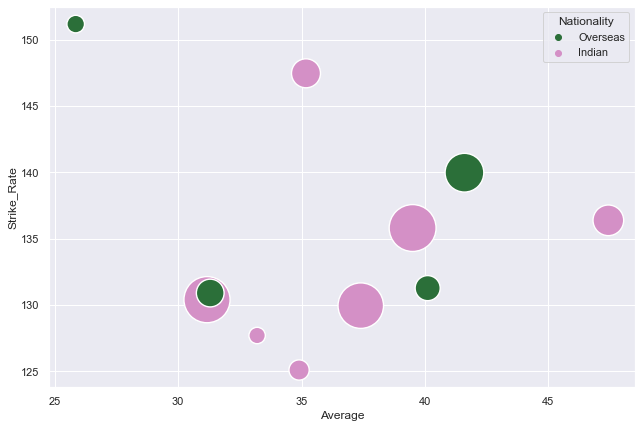

In [106]:
sns.set_theme(style = "darkgrid")
sns.set(rc={"figure.figsize":(10.5,7)})
sns.scatterplot(x=squad_batters["Average"], y=squad_batters["Strike_Rate"], hue=squad_batters['Nationality'], palette="cubehelix", s=10*squad_batters['Matches_Played'],cmap='copper')

In [107]:
squad_bowlers = pd.concat([pd.concat([frgn_bowlers_squad,ind_cap_bowlers_squad, ind_uncap_bowlers_squad])])
squad_bowlers

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
234,Anrich Nortje,Delhi,Overseas,Bowler,1,24.0,34.0,20.56,7.65,16.12
103,Nathan Coulter-Nile,Rajasthan,Overseas,Bowler,1,38.0,48.0,21.92,7.52,17.48
36,Kagiso Rabada,Punjab,Overseas,Bowler,1,50.0,76.0,20.53,8.21,15.00
215,Jasprit Bumrah,Mumbai,Indian,Bowler,1,106.0,130.0,23.05,7.42,18.63
50,Yuzvendra Chahal,Rajasthan,Indian,Bowler,1,114.0,139.0,22.28,7.59,17.61
214,Varun Chakravarthy,Kolkata,Indian,Bowler,1,31.0,36.0,23.31,6.82,20.50
45,Bhuvneshwar Kumar,Hyderabad,Indian,Bowler,1,132.0,142.0,25.27,7.30,20.77
64,R Sai Kishore,Gujarat,Indian,Bowler,0,38.0,43.0,17.40,5.46,21.42
53,Akash Deep,Bangalore,Indian,Bowler,0,22.0,26.0,18.50,6.42,21.42


<AxesSubplot:xlabel='Bowling_average', ylabel='Bowling_Strike_Rate'>

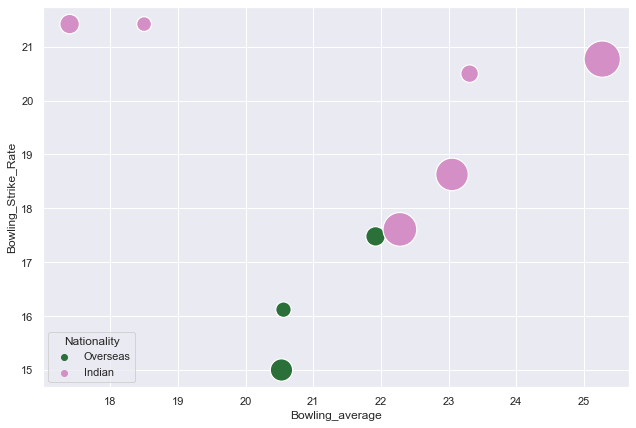

In [108]:
sns.set_theme(style = "darkgrid")
sns.set(rc={"figure.figsize":(10.5,7)})
sns.scatterplot(x=squad_bowlers["Bowling_average"], y=squad_bowlers["Bowling_Strike_Rate"], hue=squad_bowlers['Nationality'], palette="cubehelix", s=10*squad_bowlers['Matches_Played'])

<AxesSubplot:>

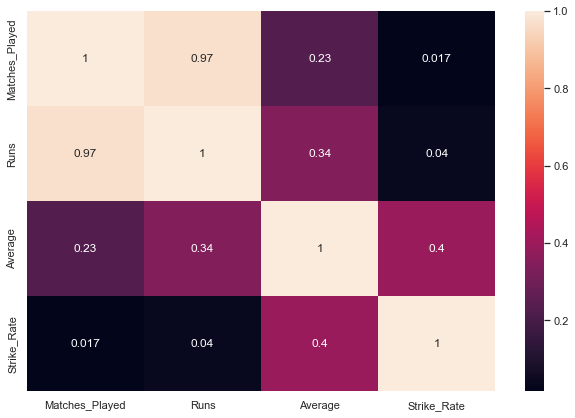

In [109]:
batters_prm = batters.drop(batters.columns[0:5], axis = 1).corr()
sns.heatmap(batters_prm,annot=True)

<AxesSubplot:>

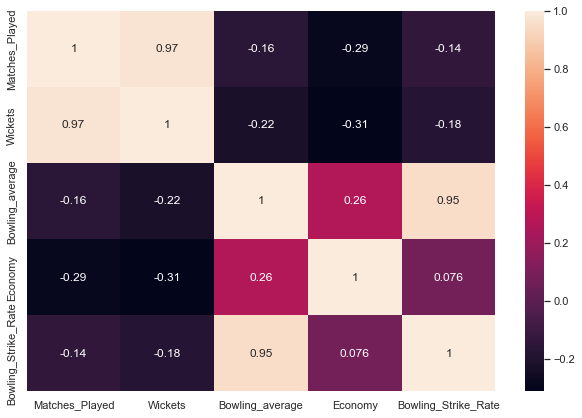

In [110]:
bowlers_prm = bowlers.drop(bowlers.columns[0:5], axis = 1).corr()
sns.heatmap(bowlers_prm,annot=True)


<AxesSubplot:>

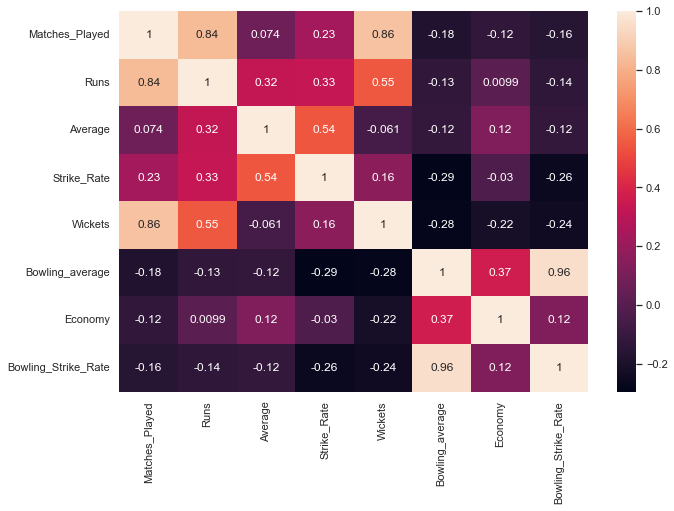

In [111]:
ar_prm = ar.drop(ar.columns[0:5], axis = 1).corr()
sns.heatmap(ar_prm,annot=True)


In [112]:
ar.groupby('Team').count()

,Player Name,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
Team,,,,,,,,,,,,
Bangalore,8,8,8,8,8,8,8,8,8,8,8,8
Chennai,7,7,7,7,7,7,7,7,7,7,7,7
Delhi,7,7,7,7,7,7,7,7,7,7,7,7
Gujarat,10,10,10,10,10,10,10,10,10,10,10,10
Hyderabad,4,4,4,4,4,4,4,4,4,4,4,4
Kolkata,10,10,10,10,10,10,10,10,10,10,10,10
Lucknow,6,6,6,6,6,6,6,6,6,6,6,6
Mumbai,6,6,6,6,6,6,6,6,6,6,6,6
Mumbai,1,1,1,1,1,1,1,1,1,1,1,1


<AxesSubplot:xlabel='Team', ylabel='Average'>

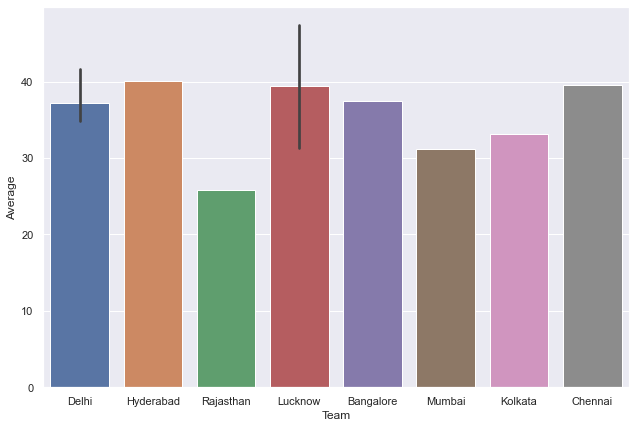

In [113]:
sns.barplot(x=squad_batters['Team'],y=squad_batters['Average'])

#### The above analysis answers the below questions
1) How to handle missing data? 
- In this project through using mean and removing unnecessary rows
2) How to work with outliers?
- By storing them separately for temporary
3) How to tranform data as per requirement? 
- E.g. Runs & Wickets were converted to Runs/Match & so on
4) What criteria should be taken to filter data?
- Here we used cumulative ranks of various parameters